Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
Simple Linear Regression for Unemployment Data
---------------------------------------------------

Root mean squared error = 1.6721
R-squared = 0.9784


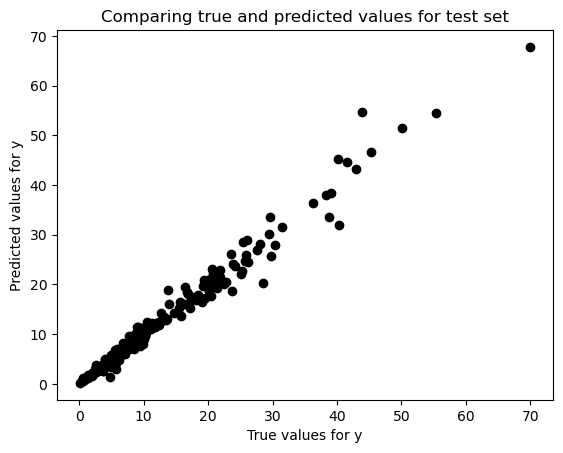

Slope =  0.9760138249950152
Intercept =  0.14851293061165727


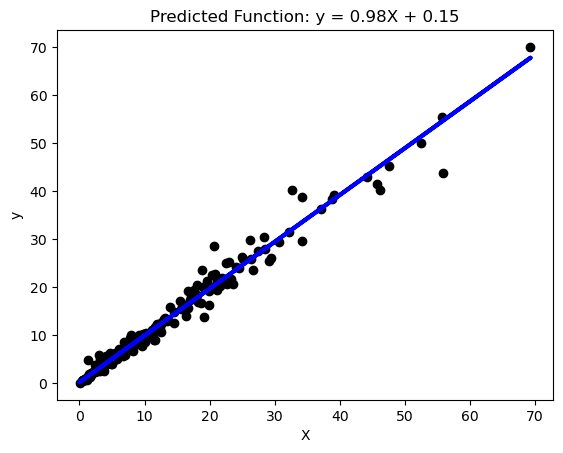

Root mean squared error = 1.3912
R-squared = 0.9834


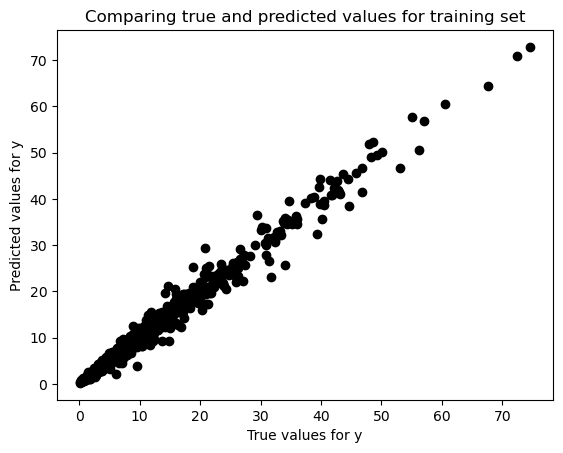

Slope =  0.9760138249950152
Intercept =  0.14851293061165727


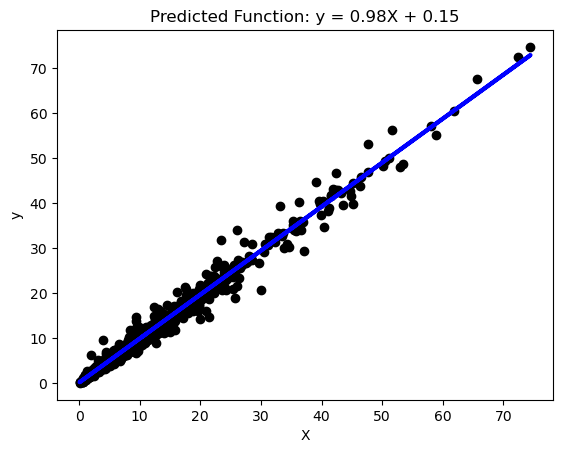


Multiple Regression for Unemployment Data
---------------------------------------------------

Regression for Admission Data
---------------------------------------------------

Classification for Admission Data
---------------------------------------------------

Confusion Matrix:
 [[ 3  6]
 [ 0 91]]
Accuracy: 0.94
F1 score: 0.97
Precision Score: 0.94
Recall score: 1.0
Classification Report:
               precision    recall  f1-score   support

Not Admitted       1.00      0.33      0.50         9
    Admitted       0.94      1.00      0.97        91

    accuracy                           0.94       100
   macro avg       0.97      0.67      0.73       100
weighted avg       0.94      0.94      0.93       100



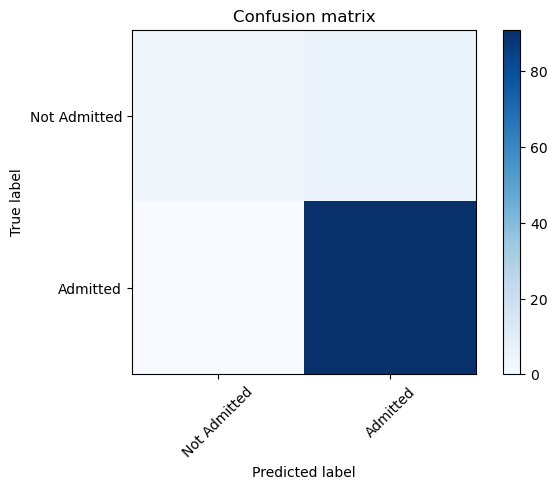

In [30]:
"""
CSC 177-01
Professor Chidella
Spring 2024
Linear Regression and Classification Assignment
Team Data Miners
Team Members: Tanner Colbert, Kevinpreet Deol, Julian Martinez, Curtis Berry, Shajaat Ali

"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import graphviz 
#import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score,recall_score,classification_report

#Reading the Data Sets from the DataSets Folder(unemployment data set, admission data set)
path = "./DataSets/"


filename_read = "global_unemployment_data_v3.csv"
df_unemployment = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = "Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv"
df_admission = pd.read_csv(filename_read, na_values=['NA','?'])

#Data Preprocessing to make data ready for Part A and B below
df_unemployment['2022'] = df_unemployment['2022'].fillna(df_unemployment['2022'].median())
df_unemployment['2023'] = df_unemployment['2023'].fillna(df_unemployment['2023'].median())
df_unemployment['2024'] = df_unemployment['2024'].fillna(df_unemployment['2024'].median())

df_unemployment = df_unemployment.drop_duplicates()

#Part A: Simple Linear Regression(Tanner Colbert, unemployment data set)
print('Simple Linear Regression for Unemployment Data')
print("---------------------------------------------------")
print()

#Splitting the Data Set
X = df_unemployment[['2014']]
y = df_unemployment[['2015']]

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

#Regression
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred_test = regr.predict(x_test)

plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
plt.show()

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

y_pred_train = regr.predict(x_train)

plt.scatter(y_train, y_pred_train, color='black')
plt.title('Comparing true and predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train))
plt.show()

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

plt.scatter(x_train, y_train,  color='black')
plt.plot(x_train, y_pred_train, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print()

#Part A: Multiple Regression(Kevinpreet Deol, unemployment data set)
print('Multiple Regression for Unemployment Data')
print("---------------------------------------------------")
print()

#Part B: Regression(Julian Martinez, admission data set)
print('Regression for Admission Data')
print("---------------------------------------------------")
print()

#Part B: Classification(Shajaat Ali, admission data set)
print('Classification for Admission Data')
print("---------------------------------------------------")
print()

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

X = df_admission.drop(['Chance of Admit '], axis=1)
y = (df_admission['Chance of Admit '] >= 0.5).astype(int)
y_mapped = y.map({0: "Not Admitted", 1: "Admitted"})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
class_labels = ["Not Admitted", "Admitted"]

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion)

plot_confusion_matrix(confusion, class_labels, title='Confusion matrix', cmap=plt.cm.Blues)


print("Accuracy:", accuracy_score(y_test, y_pred))
print('F1 score: %.2f' % (f1_score(y_test, y_pred)))
print('Precision Score: %.2f' % (precision_score(y_test, y_pred)))
print("Recall score:" ,(recall_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_labels))
